In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype='object')

In [4]:
df_min=df[df['10']==1]

In [5]:
df_min.to_csv('page-blocks0_minority_train.csv',index=False)
df_min=pd.read_csv('page-blocks0_minority_train.csv')

In [6]:
df_majority=df[df['10']==0]
df_majority.to_csv('page-blocks0_majority_train.csv',index=False)
df_majority=pd.read_csv('page-blocks0_majority_train.csv')

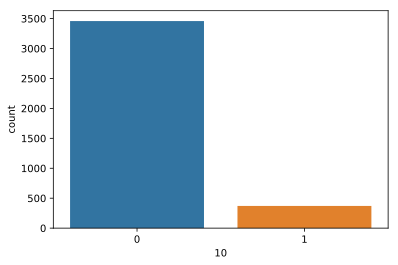

In [7]:
%matplotlib inline
sns.countplot(x='10',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(365, 5, 11)
(365, 11)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(11))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2560      
_________________________________________________________________
dense_1 (Dense)              (None, 11)                231       
Total params: 2,791
Trainable params: 2,791
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=1000,verbose=1)

Epoch 1/1000
219/219 [==============================] - 3s 15ms/step - loss: 0.1274
Epoch 2/1000
219/219 [==============================] - 0s 575us/step - loss: 0.1096
Epoch 3/1000
219/219 [==============================] - 0s 556us/step - loss: 0.0936
Epoch 4/1000
219/219 [==============================] - 0s 640us/step - loss: 0.0793
Epoch 5/1000
219/219 [==============================] - 0s 824us/step - loss: 0.0664
Epoch 6/1000
219/219 [==============================] - 0s 614us/step - loss: 0.0554
Epoch 7/1000
219/219 [==============================] - 0s 547us/step - loss: 0.0460
Epoch 8/1000
219/219 [==============================] - 0s 552us/step - loss: 0.0394
Epoch 9/1000
219/219 [==============================] - 0s 531us/step - loss: 0.0363
Epoch 10/1000
219/219 [==============================] - 0s 543us/step - loss: 0.0348
Epoch 11/1000
219/219 [==============================] - 0s 765us/step - loss: 0.0346
Epoch 12/1000
219/219 [==============================] - 0s 822u

219/219 [==============================] - 0s 508us/step - loss: 0.0319
Epoch 97/1000
219/219 [==============================] - 0s 559us/step - loss: 0.0319
Epoch 98/1000
219/219 [==============================] - 0s 531us/step - loss: 0.0319
Epoch 99/1000
219/219 [==============================] - 0s 898us/step - loss: 0.0319
Epoch 100/1000
219/219 [==============================] - 0s 671us/step - loss: 0.0319
Epoch 101/1000
219/219 [==============================] - 0s 905us/step - loss: 0.0318
Epoch 102/1000
219/219 [==============================] - 0s 639us/step - loss: 0.0318
Epoch 103/1000
219/219 [==============================] - 0s 588us/step - loss: 0.0318
Epoch 104/1000
219/219 [==============================] - 0s 637us/step - loss: 0.0317
Epoch 105/1000
219/219 [==============================] - 0s 686us/step - loss: 0.0318
Epoch 106/1000
219/219 [==============================] - 0s 568us/step - loss: 0.0317
Epoch 107/1000
219/219 [==============================] - 0s 

219/219 [==============================] - 0s 481us/step - loss: 0.0306
Epoch 191/1000
219/219 [==============================] - 0s 499us/step - loss: 0.0308
Epoch 192/1000
219/219 [==============================] - 0s 485us/step - loss: 0.0307
Epoch 193/1000
219/219 [==============================] - 0s 471us/step - loss: 0.0307
Epoch 194/1000
219/219 [==============================] - 0s 522us/step - loss: 0.0307
Epoch 195/1000
219/219 [==============================] - 0s 622us/step - loss: 0.0308
Epoch 196/1000
219/219 [==============================] - 0s 522us/step - loss: 0.0306
Epoch 197/1000
219/219 [==============================] - 0s 490us/step - loss: 0.0305
Epoch 198/1000
219/219 [==============================] - 0s 494us/step - loss: 0.0307
Epoch 199/1000
219/219 [==============================] - 0s 501us/step - loss: 0.0305
Epoch 200/1000
219/219 [==============================] - 0s 492us/step - loss: 0.0306
Epoch 201/1000
219/219 [==============================] - 

219/219 [==============================] - 0s 481us/step - loss: 0.0297
Epoch 285/1000
219/219 [==============================] - 0s 485us/step - loss: 0.0297
Epoch 286/1000
219/219 [==============================] - 0s 476us/step - loss: 0.0297
Epoch 287/1000
219/219 [==============================] - 0s 494us/step - loss: 0.0296
Epoch 288/1000
219/219 [==============================] - 0s 490us/step - loss: 0.0296
Epoch 289/1000
219/219 [==============================] - 0s 499us/step - loss: 0.0296
Epoch 290/1000
219/219 [==============================] - 0s 485us/step - loss: 0.0296
Epoch 291/1000
219/219 [==============================] - 0s 517us/step - loss: 0.0297
Epoch 292/1000
219/219 [==============================] - 0s 481us/step - loss: 0.0296
Epoch 293/1000
219/219 [==============================] - 0s 481us/step - loss: 0.0295
Epoch 294/1000
219/219 [==============================] - 0s 504us/step - loss: 0.0296
Epoch 295/1000
219/219 [==============================] - 

219/219 [==============================] - 0s 549us/step - loss: 0.0285
Epoch 379/1000
219/219 [==============================] - 0s 531us/step - loss: 0.0288
Epoch 380/1000
219/219 [==============================] - 0s 531us/step - loss: 0.0287
Epoch 381/1000
219/219 [==============================] - 0s 531us/step - loss: 0.0287
Epoch 382/1000
219/219 [==============================] - 0s 554us/step - loss: 0.0288
Epoch 383/1000
219/219 [==============================] - 0s 522us/step - loss: 0.0287
Epoch 384/1000
219/219 [==============================] - 0s 536us/step - loss: 0.0286
Epoch 385/1000
219/219 [==============================] - 0s 549us/step - loss: 0.0285
Epoch 386/1000
219/219 [==============================] - 0s 536us/step - loss: 0.0285
Epoch 387/1000
219/219 [==============================] - 0s 536us/step - loss: 0.0284
Epoch 388/1000
219/219 [==============================] - 0s 517us/step - loss: 0.0284
Epoch 389/1000
219/219 [==============================] - 

219/219 [==============================] - 0s 554us/step - loss: 0.0275
Epoch 473/1000
219/219 [==============================] - 0s 536us/step - loss: 0.0275
Epoch 474/1000
219/219 [==============================] - 0s 531us/step - loss: 0.0276
Epoch 475/1000
219/219 [==============================] - 0s 527us/step - loss: 0.0275
Epoch 476/1000
219/219 [==============================] - 0s 531us/step - loss: 0.0275
Epoch 477/1000
219/219 [==============================] - 0s 531us/step - loss: 0.0274
Epoch 478/1000
219/219 [==============================] - 0s 549us/step - loss: 0.0274
Epoch 479/1000
219/219 [==============================] - 0s 499us/step - loss: 0.0273
Epoch 480/1000
219/219 [==============================] - 0s 513us/step - loss: 0.0275
Epoch 481/1000
219/219 [==============================] - 0s 499us/step - loss: 0.0273
Epoch 482/1000
219/219 [==============================] - 0s 718us/step - loss: 0.0275
Epoch 483/1000
219/219 [==============================] - 

219/219 [==============================] - 0s 568us/step - loss: 0.0263
Epoch 567/1000
219/219 [==============================] - 0s 558us/step - loss: 0.0262
Epoch 568/1000
219/219 [==============================] - 0s 543us/step - loss: 0.0263
Epoch 569/1000
219/219 [==============================] - 0s 572us/step - loss: 0.0262
Epoch 570/1000
219/219 [==============================] - 0s 588us/step - loss: 0.0261
Epoch 571/1000
219/219 [==============================] - 0s 609us/step - loss: 0.0264
Epoch 572/1000
219/219 [==============================] - 0s 572us/step - loss: 0.0262
Epoch 573/1000
219/219 [==============================] - 0s 765us/step - loss: 0.0261
Epoch 574/1000
219/219 [==============================] - 0s 576us/step - loss: 0.0262
Epoch 575/1000
219/219 [==============================] - 0s 532us/step - loss: 0.0262
Epoch 576/1000
219/219 [==============================] - 0s 729us/step - loss: 0.0263
Epoch 577/1000
219/219 [==============================] - 

219/219 [==============================] - 0s 1ms/step - loss: 0.0251
Epoch 661/1000
219/219 [==============================] - 0s 945us/step - loss: 0.0251
Epoch 662/1000
219/219 [==============================] - 0s 865us/step - loss: 0.0254
Epoch 663/1000
219/219 [==============================] - 0s 902us/step - loss: 0.0255
Epoch 664/1000
219/219 [==============================] - 0s 871us/step - loss: 0.0251
Epoch 665/1000
219/219 [==============================] - 0s 847us/step - loss: 0.0250
Epoch 666/1000
219/219 [==============================] - 0s 895us/step - loss: 0.0252
Epoch 667/1000
219/219 [==============================] - 0s 845us/step - loss: 0.0252
Epoch 668/1000
219/219 [==============================] - 0s 972us/step - loss: 0.0256
Epoch 669/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.0255
Epoch 670/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.0253
Epoch 671/1000
219/219 [==============================] - 0s 872

219/219 [==============================] - 0s 655us/step - loss: 0.0241
Epoch 755/1000
219/219 [==============================] - 0s 632us/step - loss: 0.0241
Epoch 756/1000
219/219 [==============================] - 0s 623us/step - loss: 0.0242
Epoch 757/1000
219/219 [==============================] - 0s 659us/step - loss: 0.0242
Epoch 758/1000
219/219 [==============================] - 0s 614us/step - loss: 0.0241
Epoch 759/1000
219/219 [==============================] - 0s 611us/step - loss: 0.0241
Epoch 760/1000
219/219 [==============================] - 0s 620us/step - loss: 0.0240
Epoch 761/1000
219/219 [==============================] - 0s 625us/step - loss: 0.0242
Epoch 762/1000
219/219 [==============================] - 0s 577us/step - loss: 0.0241
Epoch 763/1000
219/219 [==============================] - 0s 600us/step - loss: 0.0241
Epoch 764/1000
219/219 [==============================] - 0s 609us/step - loss: 0.0239
Epoch 765/1000
219/219 [==============================] - 

219/219 [==============================] - 0s 623us/step - loss: 0.0231
Epoch 849/1000
219/219 [==============================] - 0s 723us/step - loss: 0.0232
Epoch 850/1000
219/219 [==============================] - 0s 618us/step - loss: 0.0233
Epoch 851/1000
219/219 [==============================] - 0s 595us/step - loss: 0.0229
Epoch 852/1000
219/219 [==============================] - 0s 600us/step - loss: 0.0231
Epoch 853/1000
219/219 [==============================] - 0s 641us/step - loss: 0.0231
Epoch 854/1000
219/219 [==============================] - 0s 609us/step - loss: 0.0230
Epoch 855/1000
219/219 [==============================] - 0s 636us/step - loss: 0.0230
Epoch 856/1000
219/219 [==============================] - 0s 938us/step - loss: 0.0231
Epoch 857/1000
219/219 [==============================] - 0s 776us/step - loss: 0.0231
Epoch 858/1000
219/219 [==============================] - 0s 600us/step - loss: 0.0230
Epoch 859/1000
219/219 [==============================] - 

219/219 [==============================] - 0s 774us/step - loss: 0.0219
Epoch 943/1000
219/219 [==============================] - 0s 623us/step - loss: 0.0220
Epoch 944/1000
219/219 [==============================] - 0s 641us/step - loss: 0.0218
Epoch 945/1000
219/219 [==============================] - 0s 687us/step - loss: 0.0218
Epoch 946/1000
219/219 [==============================] - 0s 634us/step - loss: 0.0219
Epoch 947/1000
219/219 [==============================] - 0s 600us/step - loss: 0.0218
Epoch 948/1000
219/219 [==============================] - 0s 730us/step - loss: 0.0221
Epoch 949/1000
219/219 [==============================] - 0s 627us/step - loss: 0.0218
Epoch 950/1000
219/219 [==============================] - 0s 613us/step - loss: 0.0219
Epoch 951/1000
219/219 [==============================] - 0s 634us/step - loss: 0.0219
Epoch 952/1000
219/219 [==============================] - 0s 604us/step - loss: 0.0220
Epoch 953/1000
219/219 [==============================] - 

In [14]:
model.save('page-blocks0.h5')

In [15]:
Xtrain.shape

(219, 5, 11)

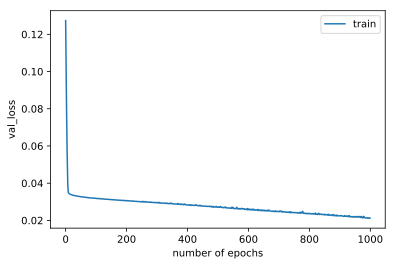

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

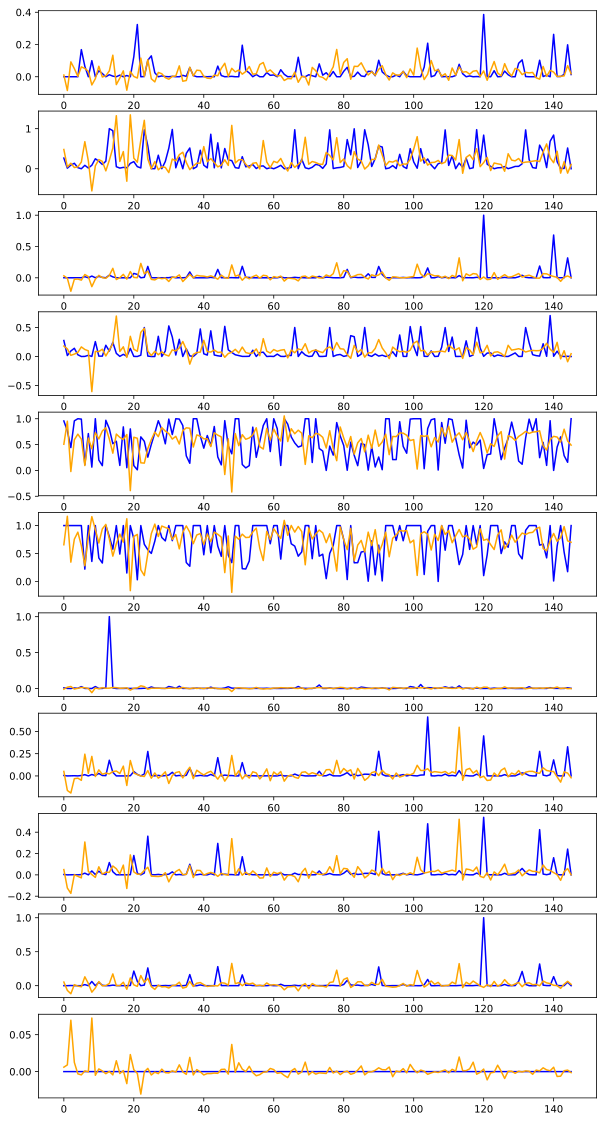

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 0.01051822,  0.48072374,  0.03166607, ...,  0.04949953,
         0.05338594,  0.00597772],
       [-0.08549674,  0.04504326, -0.00714891, ..., -0.123393  ,
        -0.06910243,  0.00903425],
       [ 0.09223342,  0.1375216 , -0.2150635 , ..., -0.17367636,
        -0.11852598,  0.0695605 ],
       ...,
       [ 0.00527622,  0.17492718,  0.00791615, ...,  0.02999701,
         0.0218422 ,  0.00116577],
       [ 0.06886129, -0.10939813,  0.02907093, ...,  0.05884932,
         0.06414048,  0.00204139],
       [ 0.01858901,  0.1086021 ,  0.00171121, ...,  0.00062595,
         0.01962046, -0.00140958]], dtype=float32)

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

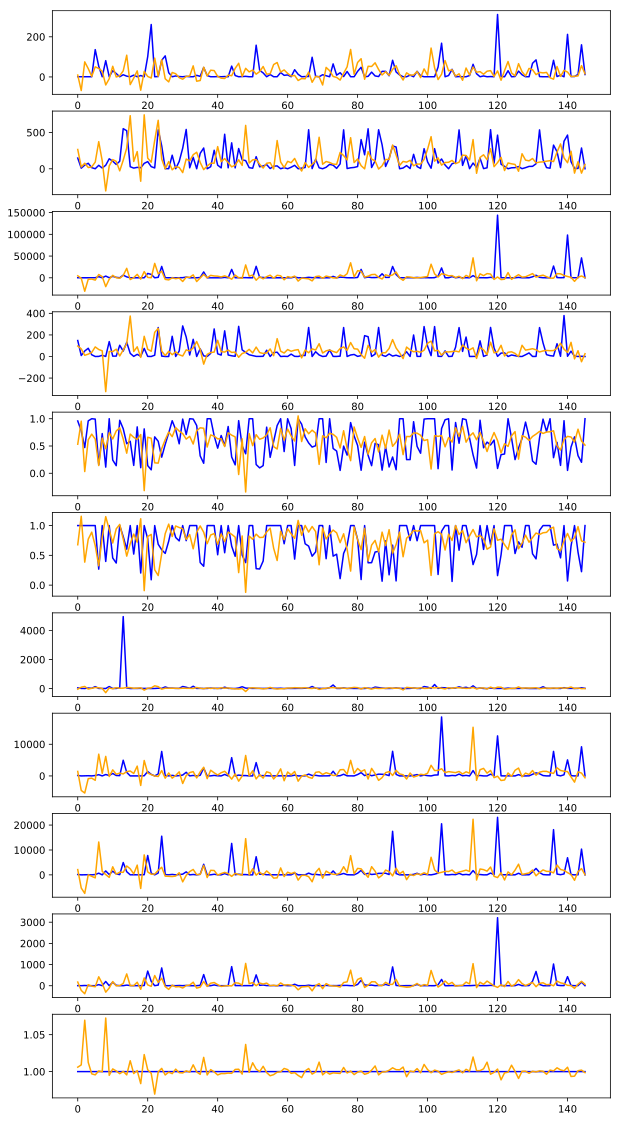

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 0.01051822,  0.48072374,  0.03166607, ...,  0.04949953,
         0.05338594,  0.00597772],
       [-0.08549674,  0.04504326, -0.00714891, ..., -0.123393  ,
        -0.06910243,  0.00903425],
       [ 0.09223342,  0.1375216 , -0.2150635 , ..., -0.17367636,
        -0.11852598,  0.0695605 ],
       ...,
       [ 0.00527622,  0.17492718,  0.00791615, ...,  0.02999701,
         0.0218422 ,  0.00116577],
       [ 0.06886129, -0.10939813,  0.02907093, ...,  0.05884932,
         0.06414048,  0.00204139],
       [ 0.01858901,  0.1086021 ,  0.00171121, ...,  0.00062595,
         0.01962046, -0.00140958]], dtype=float32)

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1.csv',index=False)